In [1]:
# ============================================
# SECTION 1: DATA LOADING & INITIAL SETUP
# ============================================
# Purpose: Load data, import libraries, and perform initial checks
# ============================================

# Data manipulation and analysis
import pandas as pd 
# Function data into training and testing sets
from sklearn.model_selection import train_test_split 
# Simple classification algorithm for binary problems
from sklearn.linear_model import LogisticRegression 
# Function to calculate prediction accuracy
from sklearn.metrics import accuracy_score 
# pd.read_csv(): Reads CSV file into pandas DataFrame object
data = pd.read_csv('gender_submission.csv')

In [2]:
# ============================================
# SECTION 2: INITIAL MODELING (WITH ISSUES)
# ============================================
# Purpose: Demonstrate basic modeling workflow (but with problematic data)
# Shows what happens when using incorrect dataset
# ============================================

# Split the data into training and testing sets
# data.drop('Survived', axis=1): X (features) - all columns except target
# data['Survived']: y (target) - what we're predicting
# test_size=0.2: 20% for testing, 80% for training
# random_state=42: Seed for random number generator (ensures same split each time)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # Features matrix X
    data['Survived'],                # Target vector y  
    test_size=0.2,                   # Proportion for test set
    random_state=42                  # Random seed for reproducibility
)
# Initialize the model
model = LogisticRegression() #instance with default parameters

# Train the model
model.fit(X_train, y_train) # adjusts weights to minimize prediction error

# Make predictions on the test set
y_pred = model.predict(X_test) # Use trained model to predict labels for X_test

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred) # Compares predicted labels (y_pred) with true labels (y_test)

# Display the accuracy score
print("Accuracy:", accuracy) # Output: 0.595 (59.5% - very low)

# Low accuracy indicates issues: likely using wrong dataset or insufficient preprocessing

Accuracy: 0.5952380952380952


In [3]:
# ============================================
# SECTION 3: CORRECT DATA LOADING & EDA SETUP
# ============================================
# Purpose: Load correct dataset and set up for exploratory analysis
# ============================================
# Import the necessary libraries
# Maninpulation and analysis
import pandas as pd 
#Foundation for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
# provide high-level interface for attractive statistical graphics
import seaborn as sns

# Load the correct Titanic dataset (contains features for modeling)
# 'Titatnic.csv': Contains the full training dataset with features and target
data = pd.read_csv('Titatnic.csv') # Filename has typo ('Titatnic' instead of 'Titanic')
# Display first 5 rows of the dataset
data.head() # verify we loaded the right data and understand its structure

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Examine the structure of the dataset
print("Dataset structure:") # Header for output section
print(data.info()) # Summary of DataFrame

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
# ============================================
# SECTION 5: EDA - TARGET VARIABLE ANALYSIS
# ============================================
# Purpose: Analyze distribution of survival (target variable)
# Understanding class balance/imbalance is crucial for model selection
# ============================================
# Analyze the distribution of the target variable
print("\nSurvived distribution:")

# Value_counts(): Counts occurrences of each unique value in Series
# Returns counts for 0 (did not survive) and 1 (survived)
print(data['Survived'].value_counts())


Survived distribution:
Survived
0    549
1    342
Name: count, dtype: int64


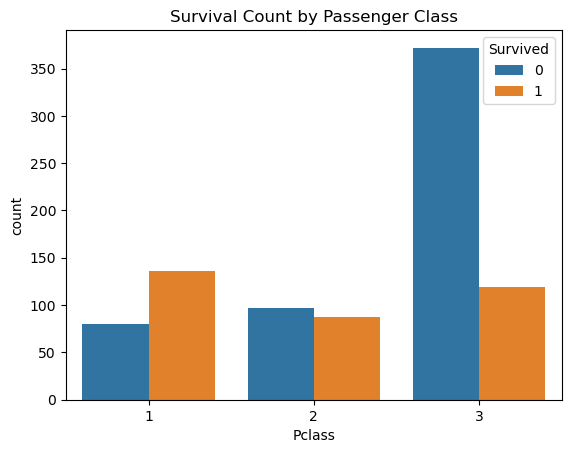

In [11]:
# ============================================
# SECTION 6: EDA - FEATURE VISUALIZATION
# ============================================
# Purpose: Visualize relationships between features and survival
# Helps identify important predictors and patterns
# ============================================

# Explore relationships between features and survival
# hue='Survived': Different colors for survived (1) vs died (0)
# data=data: Specifies DataFrame containing the data
sns.countplot(x='Pclass', hue='Survived', data=data) # x='Pclass': Passenger class on x-axis (1st, 2nd, 3rd class)
plt.title('Survival Count by Passenger Class') # Title to the plot
plt.show() # Display the plot

In [13]:
# ============================================
# SECTION 7: EDA - MISSING VALUE ANALYSIS
# ============================================
# Purpose: Identify and quantify missing data
# Missing data handling is critical for model performance
# ============================================
# check for missing values
print("\nMissing values:") # Header for missing values section

# .isnull(): Returns DataFrame of booleans (True where value is NaN)
# .sum(): Sums True values for each column (True=1, False=0)
print(data.isnull().sum()) 


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
# ============================================
# SECTION 8: DATA PREPROCESSING - MISSING VALUES
# ============================================
# Purpose: Clean and prepare data for modeling
# =============================================

# Handle missing values (example: filling missing age values with the mean)
# data['Age'].mean(): Calculates mean age from available data
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Address outliers (example: remove outliers in fare column using Z-score)
# Z-score measures how many standard deviations a value is from the mean
# Formula: z = (x - μ) / σ
z_score = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
data = data.loc[z_score.abs() < 3] # .loc[]: Accesses group of rows using boolean condition

# Handle categorical variables (example: one-hot encoding for 'Sex' column)
# Creates new columns: Sex_female, Sex_male (both binary, mutually exclusive)
data_encoded = pd.get_dummies(data, columns=['Sex'])

# Perform feature scaling (example: standardization of 'Age' and 'Fare' columns)
# Standardize Age column
# Formula: (Age - mean(Age)) / std(Age)
data_encoded['Age'] = (data_encoded['Age'] - data_encoded['Age'].mean()) / data_encoded['Age'].std()
# Standardize Fare column
data_encoded['Fare'] = (data_encoded['Fare'] - data_encoded['Fare'].mean()) / data_encoded['Fare'].std()

# Final preprocessed dataset
print("\nPreprocessed dataset:")
print(data_encoded.head())


Preprocessed dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.588813      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.639674      1      0   
2                             Heikkinen, Miss. Laina -0.281691      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.409333      1      0   
4                           Allen, Mr. William Henry  0.409333      0      0   

             Ticket      Fare Cabin Embarked  Sex_female  Sex_male  
0         A/5 21171 -0.656879   NaN        S       False      True  
1          PC 17599  1.524747   C85        C        True     False  
2  STON/O2. 3101282 -0.633881   NaN        S        True     False  
3  

C:\Users\brand\AppData\Local\Temp\ipykernel_23352\86544872.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [17]:
# ============================================
# SECTION 10: MODEL TRAINING - MULTIPLE ALGORITHMS
# ============================================
# Purpose: Train and compare different classification algorithms
# Demonstrates model selection process
# ============================================

# Import additional machine learning algorithms
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # interpretable tree model
from sklearn.ensemble import RandomForestClassifier # Ensemble of decision trees
from sklearn.svm import SVC # Support Vector Classifier (kernel-based)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# Preprocess the data (example: one-hot encoding for categorical variables)
data = pd.get_dummies(data)

# Split data into training and testing sets (standard 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # Features (all except target)
    data['Survived'],               # Target variable
    test_size=0.2,                  # 20% for testing
    random_state=42                 # Reproducible split
)

# Key: Model name (for display), Value: Model instance with default parameters
models = {
    'Logistic Regression': LogisticRegression(),  # Linear model, good baseline
    'Decision Tree': DecisionTreeClassifier(),     # Non-linear, interpretable
    'Random Forest': RandomForestClassifier(),     # Ensemble, reduces overfitting
    'Support Vector Machine': SVC()               # Kernel-based, good for complex boundaries
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Model: {model_name}")  # f-string for formatted output
    
    # Train model on training data
    # .fit(): Learns patterns from X_train to predict y_train
    model.fit(X_train, y_train)
    
    # Make predictions on test set
    # .predict(): Applies learned patterns to new data
    y_pred = model.predict(X_test)
    
    # Calculate multiple evaluation metrics
    
    # Accuracy: Overall correctness rate
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision: Of predicted survivors, how many actually survived?
    # High precision = few false alarms
    precision = precision_score(y_test, y_pred)
    
    # Recall: Of actual survivors, how many did we find?
    # High recall = missed few survivors
    recall = recall_score(y_test, y_pred)
    
    # F1-Score: Balanced measure of precision and recall
    # Harmonic mean (2 * precision * recall / (precision + recall))
    f1 = f1_score(y_test, y_pred)
    
    # Display all metrics for this model
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("-" * 40)  # Separator between models

Model: Logistic Regression


C:\Users\brand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.76
Precision: 0.7183098591549296
Recall: 0.6986301369863014
F1-Score: 0.7083333333333334
----------------------------------------
Model: Decision Tree
Accuracy: 0.8171428571428572
Precision: 0.8153846153846154
Recall: 0.726027397260274
F1-Score: 0.7681159420289855
----------------------------------------
Model: Random Forest
Accuracy: 0.8
Precision: 0.8518518518518519
Recall: 0.6301369863013698
F1-Score: 0.7244094488188977
----------------------------------------
Model: Support Vector Machine
Accuracy: 0.6114285714285714
Precision: 0.8571428571428571
Recall: 0.0821917808219178
F1-Score: 0.15
----------------------------------------


In [49]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split data (consistent with previous split for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),
    data['Survived'],
    test_size=0.2,
    random_state=42
)


# Initialize models with default parameters
logistic_regression = LogisticRegression()  # Linear classification
decision_tree = DecisionTreeClassifier()    # Single decision tree
random_forest = RandomForestClassifier()    # Ensemble of trees

# Train each model (no parameter tuning yet)
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Evaluate using .score() method (returns accuracy by default)
logistic_regression_score = logistic_regression.score(X_test, y_test)
decision_tree_score = decision_tree.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)

# Display baseline accuracy scores
print(f"Logistic Regression Score: {logistic_regression_score}")
print(f"Decision Tree Score: {decision_tree_score}")
print(f"Random Forest Score: {random_forest_score}")

C:\Users\brand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Score: 0.76
Decision Tree Score: 0.8171428571428572
Random Forest Score: 0.8057142857142857


In [51]:
# ============================================
# SECTION 12: HYPERPARAMETER TUNING - GRID SEARCH
# ============================================
# Purpose: Systematically find optimal parameters for Decision Tree
# Grid Search evaluates ALL combinations in specified grid
# ============================================

# Define parameter grid for Decision Tree
# Dictionary where keys are parameter names, values are lists to try
param_grid = {
    'max_depth': [3, 5, 7],           # Maximum depth of tree (controls complexity)
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 3, 5]     # Min samples required at a leaf node
}
# Total combinations: 3 * 3 * 3 = 27 parameter sets to try

# Create GridSearchCV object
decision_tree_grid = GridSearchCV(
    DecisionTreeClassifier(),  # Model to optimize
    param_grid,                # Parameter search space
    cv=5                       # 5-fold cross-validation
)

# Extract best parameters and corresponding score
best_params_grid = decision_tree_grid.best_params_  # Best parameter combination

best_score_grid = decision_tree_grid.best_score_    # Best cross-validation score


# Display grid search results
print("Grid Search - Decision Tree")
print(f"Best Parameters: {best_params_grid}")  # Optimal parameter values found
print(f"Best Score: {best_score_grid}")        # Best CV accuracy achieved


# Define parameter distribution for Random Search
# Can include None values and more options than Grid Search
param_dist = {
    'max_depth': [3, 5, 7, None],     # None means no depth limit
    'min_samples_split': [2, 5, 10],  # Same options as grid search
    'min_samples_leaf': [1, 3, 5],    # Same options as grid search
    'criterion': ['gini', 'entropy']  # Split quality measure (new parameter)
}
# Create RandomizedSearchCV object
# n_iter=10: Try only 10 random combinations (not all 72)
# random_state=42: Reproducible random sampling
decision_tree_random = RandomizedSearchCV(
    DecisionTreeClassifier(),  # Model to optimize
    param_dist,                # Parameter distribution
    cv=5,                      # 5-fold cross-validation
    n_iter=10,                 # Number of parameter settings to sample
    random_state=42            # Random seed for reproducibility
)

# Execute random search (trains model 10 * 5 = 50 times)
decision_tree_random.fit(X_train, y_train)

# Extract best parameters and score
best_params_random = decision_tree_random.best_params_
best_score_random = decision_tree_random.best_score_

# Display random search results
print("Random Search - Decision Tree")
print(f"Best Parameters: {best_params_random}")
print(f"Best Score: {best_score_random}")

Grid Search - Decision Tree
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8247276464542652
Random Search - Decision Tree
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best Score: 0.8304830421377185


In [23]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib # Import joblib for model serializatio

In [25]:
# Ensure consistent data split (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),
    data['Survived'],
    test_size=0.2,
    random_state=42
)

# Train a Random Forest model (chosen based on previous performance)
random_forest = RandomForestClassifier()  # Instantiate with default parameters
random_forest.fit(X_train, y_train)       # Train on full training set
# Save the trained model
joblib.dump(random_forest, 'random_forest_model.pkl')

# Load the saved model from disk
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions using loaded model
predictions = loaded_model.predict(X_test)

# Evaluate loaded model performance (should match original)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}") # Should output same accuracy as original random_forest model

# Analyze feature importance
feature_importance = loaded_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for clear visualization of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,      # Feature names
    'Importance': feature_importance  # Importance scores
})

# Sort DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(
    by='Importance',
    ascending=False
)

# Display feature importance analysis
print("Feature Importance:")
print(feature_importance_df)

Accuracy: 0.8057142857142857
Feature Importance:
                              Feature  Importance
878                          Sex_male    0.095347
877                        Sex_female    0.088333
5                                Fare    0.065463
1                              Pclass    0.051766
2                                 Age    0.049939
...                               ...         ...
413          Name_Jussila, Mr. Eiriik    0.000000
414   Name_Kallio, Mr. Nikolai Erland    0.000000
1176                    Ticket_345572    0.000000
416            Name_Kantor, Mr. Sinai    0.000000
851           Name_Willey, Mr. Edward    0.000000

[1692 rows x 2 columns]
